# TASK1:Prediction using supervised ML

To predict the percentage of an student based on the number of study hours

by:Ampolu Nisa

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
url="http://bit.ly/w-data" 
s_data=pd.read_csv(url)

In [54]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploring the data

In [55]:
s_data.shape

(25, 2)

In [56]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


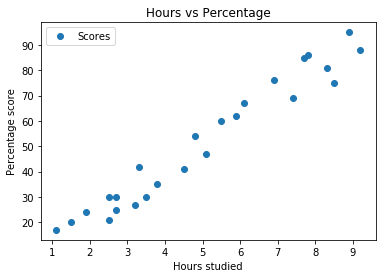

In [58]:
s_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

# Preprocessing the data

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [60]:
x=s_data.drop(["Scores"],axis=1)
y=s_data.Scores

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the Algorithm

In [62]:
Linear_reg=LinearRegression()
Linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(Linear_reg.coef_)
print(Linear_reg.intercept_)

[9.91065648]
2.018160041434683


In [64]:
line=Linear_reg.coef_*x+Linear_reg.intercept_

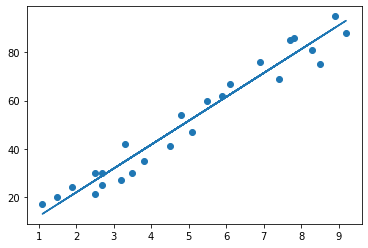

In [65]:
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

# Making Predictions

In [66]:
pred_test=Linear_reg.predict(x_test)
pred_test

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [67]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred_test})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Q:What will be predicted score if a student study for 9.25 hours in a day?

In [68]:
y_pred = Linear_reg.predict([[9.25]])
print('Predicted Score :',y_pred[0])

Predicted Score : 93.69173248737538


In [69]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred_test))

Mean Absolute Error: 4.183859899002975


# Therefore,Task#1 Completed.